In [98]:
import agent
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
from copy import deepcopy

### Environnement

In [150]:
env = gym.make('CartPole-v0')
seed = 456

In [156]:
env.observation_space.shape

(4,)

### Agent

In [151]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])
num_tilings = 

agent_init = {
    'seed': seed,
    'discount_factor': 1,
    'learning_rate': 0.5,
    'exploration_rate': {
        'er': 1.0,
        'max_er': 1.0,
        'min_er': 0.0,
        'decay_er': 0.025,
        'constant_er': False
    },
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0.0,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    },
    'trace_decay': 1,
    'eligibility_method': 'replace'
}

In [152]:
train_session = None

In [153]:
agent_init_2, agent_init_3, agent_init_4 = deepcopy(agent_init), deepcopy(agent_init), deepcopy(agent_init)
agent_init_2["trace_decay"] = "0.75"
agent_init_2["eligibility_method"] = "accumulate"
agent_init_3["trace_decay"] = "0.50"
agent_init_4["trace_decay"] = "0.25"
agent_init_2["eligibility_method"] = "accumulate"

if False:
    expected_sarsa_agent = agent.SarsaLambdaAgent(agent_init)
    expected_sarsa_agent_2 = agent.SarsaLambdaAgent(agent_init_2)
    expected_sarsa_agent_3 = agent.SarsaLambdaAgent(agent_init_3)
    expected_sarsa_agent_4 = agent.SarsaLambdaAgent(agent_init_4)
    agents = {'qlearning': expected_sarsa_agent, 'sarsa': expected_sarsa_agent_2, 
              'expected_sarsa': expected_sarsa_agent_3, 'sarsa_lambda': expected_sarsa_agent_4}
else:
    q_learning_agent = agent.QLearningAgent(agent_init)
    sarsa_agent = agent.SarsaAgent(agent_init)
    expected_sarsa_agent = agent.ExpectedSarsaAgent(agent_init)
    sarsa_lambda_agent = agent.SarsaLambdaAgent(agent_init)
    agents = {'qlearning': q_learning_agent, 'sarsa': sarsa_agent, 
              'expected_sarsa': expected_sarsa_agent, 'sarsa_lambda': sarsa_lambda_agent}

/home/benoit/Documents/work/reinforcement_learning/function_approximation/linear_method/mountain_car/utils.py:30: RuntimeWarning: overflow encountered in float_scalars
  self.velocity_scale = self.num_tiles / (velocity_boundaries[1] - velocity_boundaries[0])


### RUN

In [142]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession(agents, env, seed)

Train Session reset


In [143]:
n_episode = 500
t_max_per_episode = 200
graphical = False

In [144]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode, graphical=graphical)

100%|██████████| 500/500 [00:13<00:00, 38.36it/s]


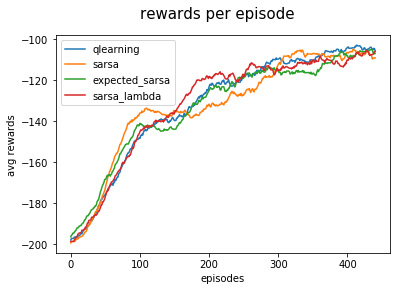

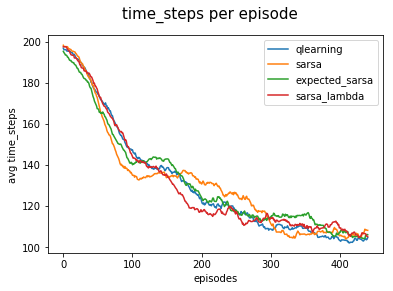

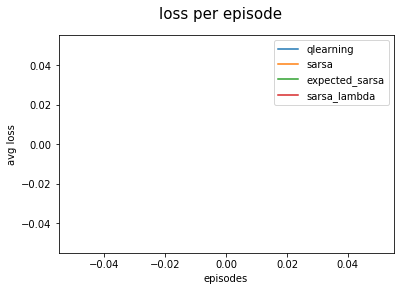

In [145]:
train_session.plot_results(moving_average_n=60)

### ANALYSIS

In [20]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.min()

82

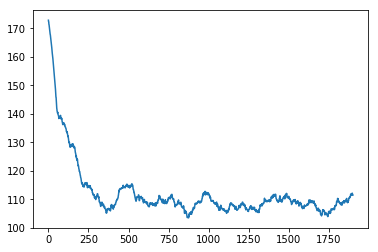

In [22]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=100)
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)

In [11]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0)

array([125.  , 125.45, 129.5 , 122.2 , 128.7 , 121.  , 125.25, 120.7 ,
       128.6 , 121.25, 125.25, 125.3 , 120.75, 126.25, 120.9 , 123.35,
       122.15, 126.65, 123.05, 126.75, 119.7 , 127.5 , 124.85, 132.3 ,
       122.3 , 127.9 , 128.2 , 116.95, 122.05, 122.2 , 123.55, 118.1 ,
       131.2 , 124.45, 121.35, 125.45, 117.2 , 119.45, 121.05, 132.15,
       125.6 , 128.85, 121.55, 111.6 , 125.8 , 122.9 , 125.45, 121.55,
       122.15, 122.  , 116.25, 113.55, 127.  , 118.4 , 126.  , 127.15,
       124.95, 122.8 , 119.55, 129.6 , 129.05, 120.25, 123.4 , 125.4 ,
       118.95, 125.8 , 128.45, 125.75, 117.55, 115.  , 122.65, 122.2 ,
       122.45, 122.95, 121.95, 118.2 , 118.05, 116.6 , 117.45, 123.45,
       123.55, 125.4 , 121.05, 119.15, 116.65, 122.1 , 126.1 , 111.4 ,
       120.5 , 125.4 , 112.5 , 118.9 , 115.3 , 127.4 , 121.35, 116.85,
       126.6 , 117.65, 119.25, 126.2 ])

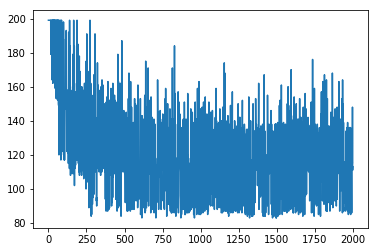

In [12]:
plt.plot(range(n_episode), timesteps_per_episode)

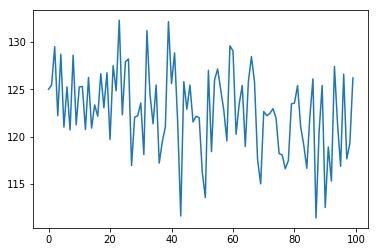

In [13]:
plt.plot(range(int(n_episode/epoch_size)), timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0))

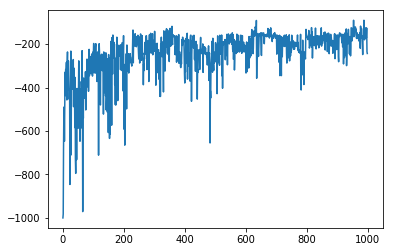

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)